In [ ]:
%pip install matplotlib-venn
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib_venn import venn2


In [24]:
df = pd.read_csv("student_expectation_decider_dataset.csv")

In [25]:
# Empirical Probability of passing the final exam
empirical_pass_prob = len(df[df["final_exam_pass"] == "Pass"])/len(df)
empirical_pass_prob

0.755

In [ ]:
# Theoretical Probability of passing the final exam
theoretical_pass_prob = 1 / 2
theoretical_pass_prob

0.5

In [27]:
# Distribution Table for Random Variable
p = empirical_pass_prob
q = 1 - p

distribution = {}
for k in range(4):
    distribution[k] = math.comb(3, k) * (p**k) * (q**(3-k))

distribution

{0: 0.014706124999999999, 1: 0.135956625, 2: 0.418968375, 3: 0.430368875}

In [28]:
# Mean and Variance of Binomial Random Variable
n = 3

mean_X = n * p
variance_X = n * p * q

mean_X, variance_X


(2.265, 0.554925)

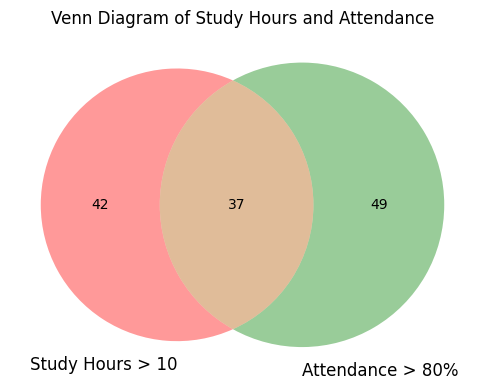

In [29]:
# Venn Diagram
# Event A: study hours > 10
A = set(df[df["study_hours"] > 10].index)

# Event B: attendance > 80%
B = set(df[df["attendance"] > 80].index)

plt.figure(figsize=(6, 6))

venn2([A, B], set_labels=("Study Hours > 10", "Attendance > 80%"))

plt.title("Venn Diagram of Study Hours and Attendance")
plt.show()

In [ ]:
# Contingency Table
contingency_table = pd.crosstab(
    df["group_discussion"],
    df["final_exam_pass"]
)
contingency_table


final_exam_pass,Fail,Pass
group_discussion,,
No,35,60
Yes,14,91


In [31]:
# Joint Probability of participating in group discussion and passing the final exam
joint_probability = contingency_table.loc["Yes", "Pass"] / len(df)
joint_probability

np.float64(0.455)

In [32]:
# Marginal Probability of passing the final exam
marginal_probability_pass = (df["final_exam_pass"] == "Pass").mean()
marginal_probability_pass

np.float64(0.755)

In [33]:
# Conditional Probability of passing the final exam given participation in group discussion
conditional_probability = (
    contingency_table.loc["Yes", "Pass"] /
    contingency_table.loc["Yes"].sum()
)
conditional_probability


np.float64(0.8666666666666667)

In [34]:
# Overall probability of passing
P_pass = (df["final_exam_pass"] == "Pass").mean()

# Conditional probability of passing given group discussion participation
P_pass_given_discussion = (
    contingency_table.loc["Yes", "Pass"] /
    contingency_table.loc["Yes"].sum()
)

P_pass, P_pass_given_discussion


(np.float64(0.755), np.float64(0.8666666666666667))

In [35]:
# Checking Independence

if (P_pass_given_discussion == P_pass):
    print("INDEPENDENT Events")
else:
    print("DEPENDENT Events")

DEPENDENT EVENTS


In [36]:
#Bayes Theorem Application

def bayes_theorem(p_a, p_b_given_a, p_b_given_not_a):
    """
    p_a              : P(A) : P(P) -> Pass
    p_b_given_a      : P(B|A) : P(H|P) -> High Attendance given Pass
    p_b_given_not_a  : P(B|~A) : P(F) -> Fail
    """
    p_not_a = 1 - p_a
    p_b = (p_b_given_a * p_a) + (p_b_given_not_a * p_not_a)
    p_a_given_b = (p_b_given_a * p_a) / p_b
    return p_a_given_b

# Given values
p_b_given_a = 0.70
p_b_given_not_a = 0.40
p_b = 0.60

# Calculate P(A)
p_a = (p_b - p_b_given_not_a) / (p_b_given_a - p_b_given_not_a)
p_a
result = bayes_theorem(p_a, p_b_given_a, p_b_given_not_a)
result


0.7777777777777777